# FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# Import libraries for data manipulation
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/AIML/foodhub_order.csv') ## Fill the blank to read the data

In [ ]:
# Returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### Number of rows and attributes

In [ ]:
# Check the shape of the dataset
df.shape ## Fill in the blank

(1898, 9)

### Identifying data types

In [ ]:
df.info()
print(df.dtypes)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   Revenue                1898 non-null   float64
 10  total_time             1898 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 163.2+ KB
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order    

### Missing value treatment

In [ ]:
# Checking for missing values in the data
df.isnull().sum()  #Write the appropriate function to print the sum of null values for each column
#df['rating'] = df['rating'].replace('Not given', np.nan)

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


### Statistical summary of data i.e Identify min, mean, max, standard deviation to understand the data beter.

In [ ]:
# Get the summary statistics of the numerical data
df.describe() ## Write the appropriate function to print the statitical summary of the data (Hint - you have seen this in the case studies before)

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


### How many deliveries are not rated ?

In [ ]:
df['rating'].value_counts(dropna=False) ## Complete the code


,count
rating,
Not given,736
5,588
4,386
3,188


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### Observations on data distributions using plots.   The focus here is to analyse individual variables.

#### Order ID

In [ ]:
# check unique order ID
df['order_id'].nunique()


1898

#### Customer ID

In [ ]:
# check unique customer ID
df['customer_id'].nunique() ## Complete the code to find out number of unique Customer ID

1200

#### Restaurant name

In [ ]:
# check unique Restaurant Name
df['restaurant_name'].nunique()  ## Complete the code to find out number of unique Restaurant Name

178

#### Cuisine type

In [ ]:
# Check unique cuisine type
df['cuisine_type'].nunique()  ## Complete the code to find out  number of  unique cuisine type


14

In [ ]:
df['rating'].nunique()  ## Complete the code to find out  number of  unique cuisine type


4

In [ ]:
df['day_of_the_week'].nunique()  ## Complete the code to find out  number of  unique cuisine type

2

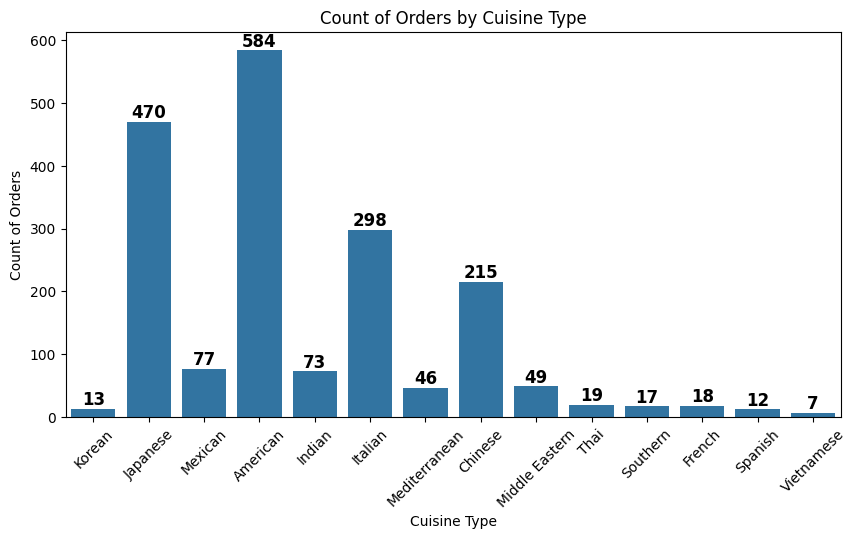

<Figure size 640x480 with 0 Axes>

In [ ]:
#plt.figure(figsize = (15,5))
#sns.countplot(data = df, x = 'cuisine_type') ## Create a countplot for cuisine type.
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='cuisine_type')

# Add count labels on top of bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.xlabel("Cuisine Type")
plt.ylabel("Count")
plt.title("Count of Orders by Cuisine Type")
plt.ylabel('Count of Orders')
plt.show()
plt.savefig("/content/drive/MyDrive/AIML/cuisinetypes.jpg", bbox_inches='tight')
plt.show()  # To display the plot if needed

#### Cost of the order

In [ ]:
df['cost_of_the_order'].describe()

,cost_of_the_order
count,1898.000000
mean,16.498851
std,7.483812
min,4.470000
25%,12.080000
50%,14.140000
75%,22.297500
max,35.410000


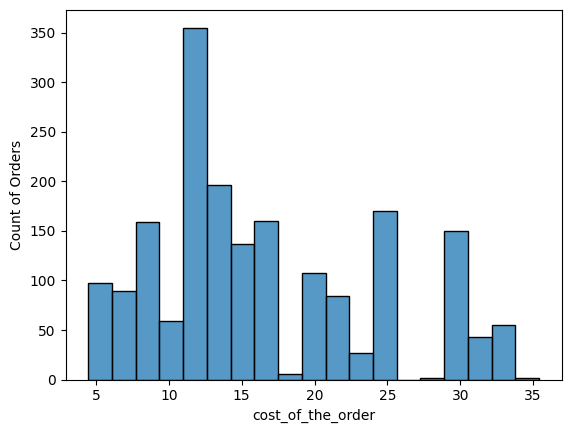

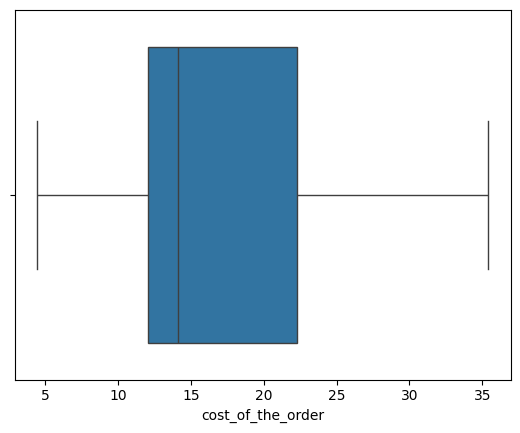

In [ ]:

sns.histplot(data=df,x='cost_of_the_order') ## Histogram for the cost of order
plt.ylabel('Count of Orders')
plt.show()
sns.boxplot(data=df,x='cost_of_the_order') ## Boxplot for the cost of order

plt.show()

#### Day of the week

In [ ]:
# # Check the unique values
df['day_of_the_week'].unique()## Complete the code to check unique values for the 'day_of_the_week' column

array(['Weekend', 'Weekday'], dtype=object)

In [ ]:
df['day_of_the_week'].describe()

,day_of_the_week
count,1898
unique,2
top,Weekend
freq,1351


Text(0, 0.5, 'Count of Orders')

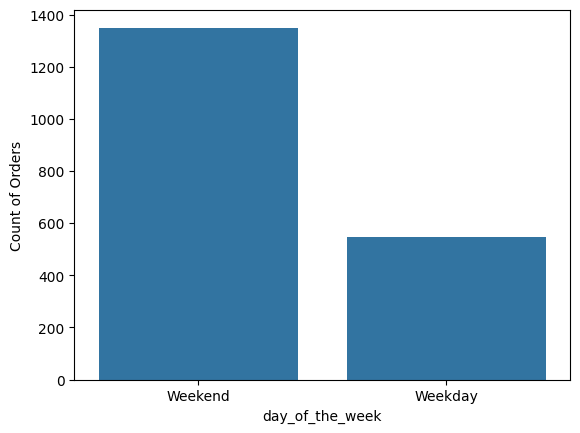

In [ ]:
sns.countplot(data = df, x = 'day_of_the_week') ## Complete the code to plot a bar graph for 'day_of_the_week' column
plt.ylabel('Count of Orders')

#### Rating

In [ ]:
# Check the unique values
df['rating'].unique() ## Complete the code to check unique values for the 'rating' column

array(['Not given', '5', '3', '4'], dtype=object)

In [ ]:
df['rating'].value_counts()

,count
rating,
Not given,736
5,588
4,386
3,188


<Axes: xlabel='rating', ylabel='Count of Orders'>

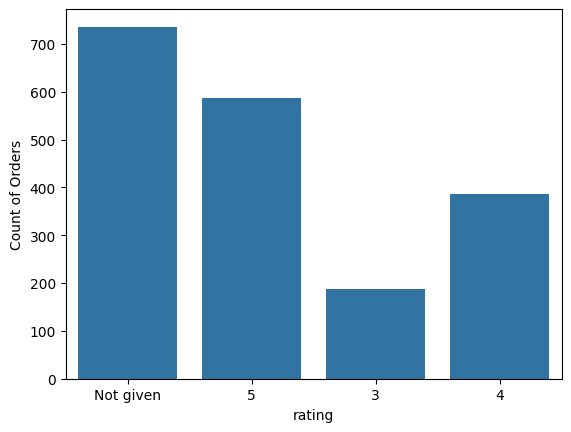

In [ ]:
df['rating'] = df['rating'].fillna('Not Given')
plt.ylabel('Count of Orders')
sns.countplot(data = df, x = 'rating') ## Complete the code to plot bar graph for 'rating' column

#### Food Preparation time

In [ ]:
df['food_preparation_time'].describe()

,food_preparation_time
count,1898.000000
mean,27.371970
std,4.632481
min,20.000000
25%,23.000000
50%,27.000000
75%,31.000000
max,35.000000


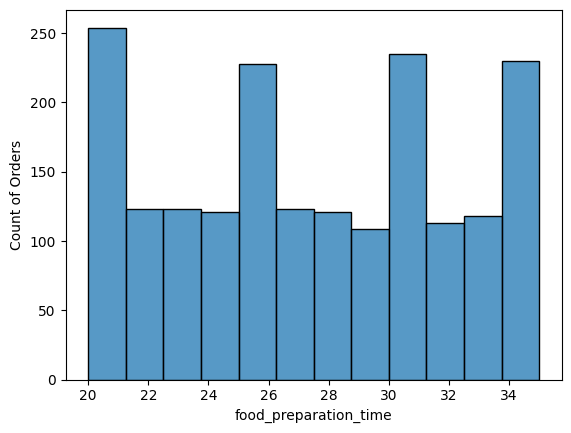

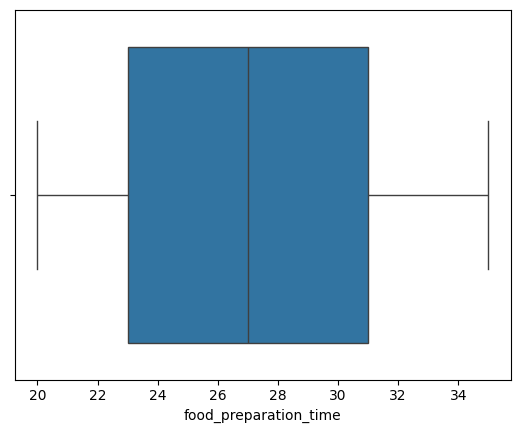

In [ ]:
sns.histplot(data=df,x='food_preparation_time') ## Complete the code to plot the histogram for the cost of order
plt.ylabel('Count of Orders')
plt.show()
sns.boxplot(data=df,x='food_preparation_time') ## Complete the code to plot the boxplot for the cost of order
plt.show()



#### Delivery time

In [ ]:
df['delivery_time'].describe()

,delivery_time
count,1898.000000
mean,24.161749
std,4.972637
min,15.000000
25%,20.000000
50%,25.000000
75%,28.000000
max,33.000000


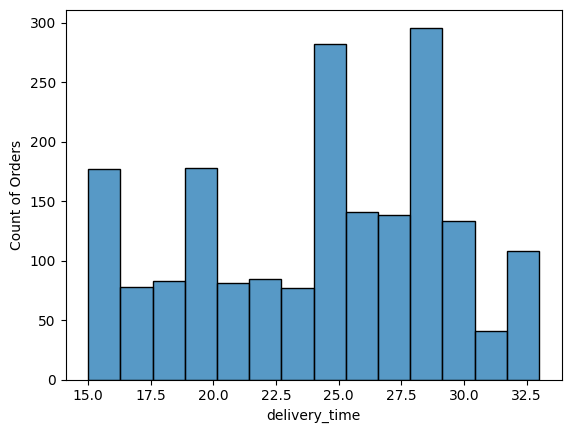

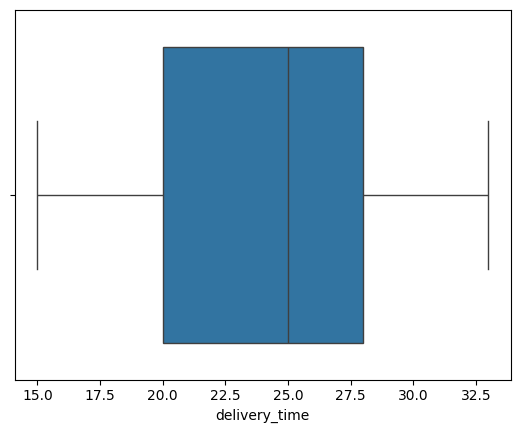

In [ ]:
sns.histplot(data=df,x='delivery_time')
plt.ylabel('Count of Orders')
plt.show()
sns.boxplot(data=df,x='delivery_time')
plt.show()

Which are the top 5 restaurants in terms of the number of orders received

In [ ]:
df_filtered = df[df['rating'] != 'Not given']
# Grouping by restaurant_name and rating, calculating delivery time statistics
rating_analysis = df_filtered.groupby(['restaurant_name', 'rating'])['delivery_time'].agg(['count', 'mean', 'median', 'std']).reset_index()

# Dropping rows where 'std' is NaN (happens when there's only one delivery time for a restaurant)
rating_analysis = rating_analysis.dropna()

# Sorting by rating (descending) and mean delivery time (ascending)
rating_analysis = rating_analysis.sort_values(by=['rating', 'mean'], ascending=[False, True])


print(rating_analysis)

               restaurant_name rating  count       mean  median       std
272   Yama Japanese Restaurant      5      5  18.400000    16.0  5.412947
23                 Big Daddy's      5      2  19.000000    19.0  4.242641
64                Cho Dang Gol      5      3  19.666667    17.0  5.507571
262           Westville Hudson      5      6  19.833333    19.0  4.400758
72   Dickson's Farmstand Meats      5      2  20.000000    20.0  0.000000
..                         ...    ...    ...        ...     ...       ...
47                 Cafe Habana      3      2  28.000000    28.0  0.000000
99                 Han Dynasty      3      3  28.333333    29.0  1.154701
257              Waverly Diner      3      2  28.500000    28.5  4.949747
118                J. G. Melon      3      2  29.000000    29.0  5.656854
162              P.J. Clarke's      3      2  29.000000    29.0  1.414214

[158 rows x 6 columns]


In [ ]:
# Get top 5 restaurants with highest number of orders
df['restaurant_name'].value_counts().head(5) ## Complete the code
# Save the plot as an image



,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


Which is the most popular cuisine on weekends

In [ ]:
# Get most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']
df_weekend['cuisine_type'].value_counts() ## Complete the code to check unique values for the cuisine type on weekend

,count
cuisine_type,
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15


What percentage of the orders cost more than 20 dollars


In [ ]:
# Get orders that cost above 20 dollars
df_greater_than_20 = df[df['cost_of_the_order']>20] ## Write the appropriate column name to get the orders having cost above $20

# Calculate the number of total orders where the cost is above 20 dollars
print('The number of total orders that cost above 20 dollars is:', df_greater_than_20.shape[0])

# Calculate percentage of such orders in the dataset
percentage = (df_greater_than_20.shape[0] / df.shape[0]) * 100

print("Percentage of orders above 20 dollars:", round(percentage, 2), '%')

The number of total orders that cost above 20 dollars is: 555
Percentage of orders above 20 dollars: 29.24 %


What is the mean order delivery time

In [ ]:
# Get the mean delivery time
mean_del_time = df['delivery_time'].mean()  ## Write the appropriate function to obtain the mean delivery time

print('The mean delivery time for this dataset is', round(mean_del_time, 2), 'minutes')

The mean delivery time for this dataset is 24.16 minutes


The company has decided to give 20% discount vouchers to the top 5 most frequent customers. Find the IDs of these customers and the number of orders they placed.

In [ ]:
# Get the counts of  each customer_id
df['customer_id'].value_counts().head(5)  ## Write the appropriate column name to get the top 5 cmost frequent customers

,count
customer_id,
52832,13
47440,10
83287,9
250494,8
259341,7


### Multivariate Analysis

 Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables)

#### Cuisine vs Cost of the order

In [ ]:
# Calculate the summary statistics for cost of order by cuisine type
summary_stats = df.groupby('cuisine_type')['cost_of_the_order'].describe()

# Display the summary statistics
print(summary_stats)


                count       mean       std    min      25%     50%      75%  \
cuisine_type                                                                  
American        584.0  16.319829  7.462290   4.71  12.0800  14.120  22.2600   
Chinese         215.0  16.305209  7.631503   4.75  12.1050  14.120  21.8800   
French           18.0  19.793889  6.508990  11.98  13.0525  20.470  23.6550   
Indian           73.0  16.919726  7.897493   5.34  11.6400  16.150  24.2000   
Italian         298.0  16.418691  7.268831   5.05  12.0800  14.480  22.2600   
Japanese        470.0  16.304532  7.422722   4.47  12.0800  14.070  21.8300   
Korean           13.0  14.001538  7.563540   5.77  11.8400  12.180  14.0200   
Mediterranean    46.0  15.474783  7.604720   5.67  12.0925  13.995  18.7825   
Mexican          77.0  16.933117  7.555108   4.85  12.0800  15.570  22.3600   
Middle Eastern   49.0  18.820612  8.086499   5.77  12.9500  16.300  25.2700   
Southern         17.0  19.300588  7.966032   7.38  1

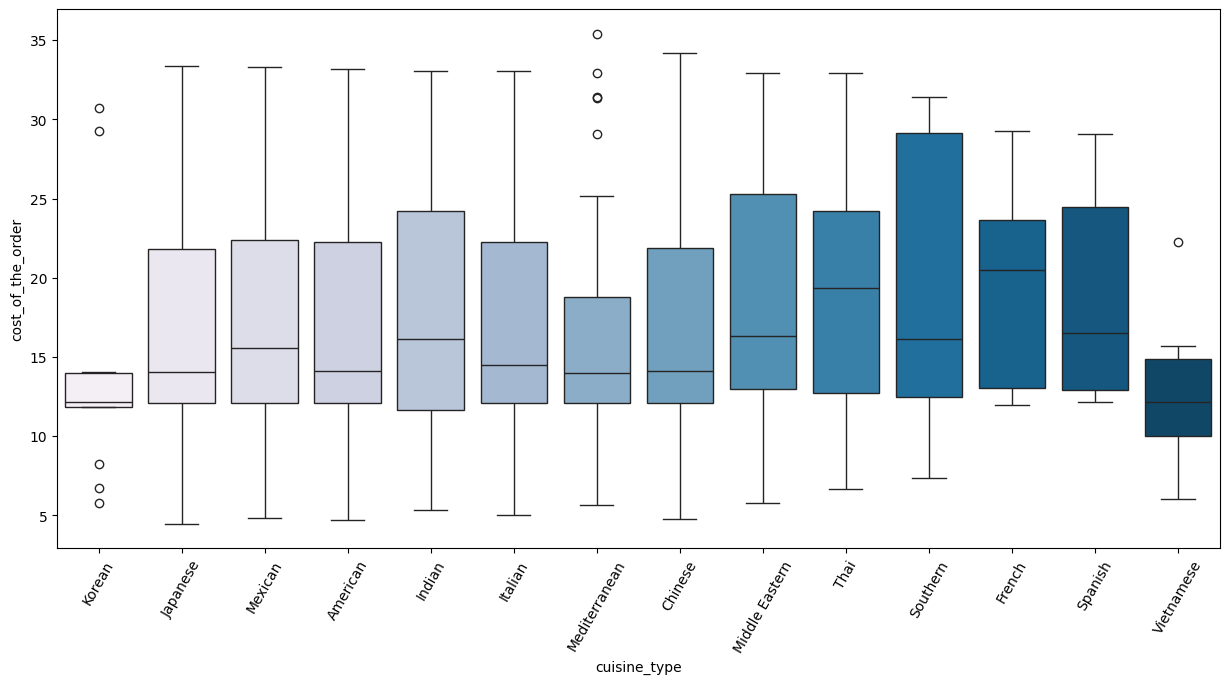

In [ ]:
# Relationship between cost of the order and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x = "cuisine_type", y = "cost_of_the_order", data = df, palette = 'PuBu', hue = "cuisine_type")
plt.xticks(rotation = 60)
plt.show()

#### Cuisine vs Food Preparation time

In [ ]:
# Calculate the summary statistics for cost of order by cuisine type
summary_stats = df.groupby('cuisine_type')['food_preparation_time'].describe()

# Display the summary statistics
print(summary_stats)

                count       mean       std   min    25%   50%   75%   max
cuisine_type                                                             
American        584.0  27.440068  4.658474  20.0  23.00  27.0  31.0  35.0
Chinese         215.0  27.511628  4.758525  20.0  23.50  27.0  32.0  35.0
French           18.0  26.888889  5.039712  21.0  22.50  25.5  31.0  35.0
Indian           73.0  27.109589  4.620491  20.0  23.00  27.0  31.0  35.0
Italian         298.0  27.483221  4.519474  20.0  23.00  28.0  31.0  35.0
Japanese        470.0  27.510638  4.604496  20.0  24.00  27.5  32.0  35.0
Korean           13.0  25.461538  3.971049  20.0  23.00  25.0  26.0  33.0
Mediterranean    46.0  27.000000  4.908043  20.0  23.00  27.0  31.0  35.0
Mexican          77.0  26.727273  4.604450  20.0  23.00  26.0  31.0  35.0
Middle Eastern   49.0  26.673469  4.012417  20.0  24.00  27.0  30.0  34.0
Southern         17.0  27.588235  5.523346  20.0  24.00  26.0  33.0  35.0
Spanish          12.0  26.916667  4.50

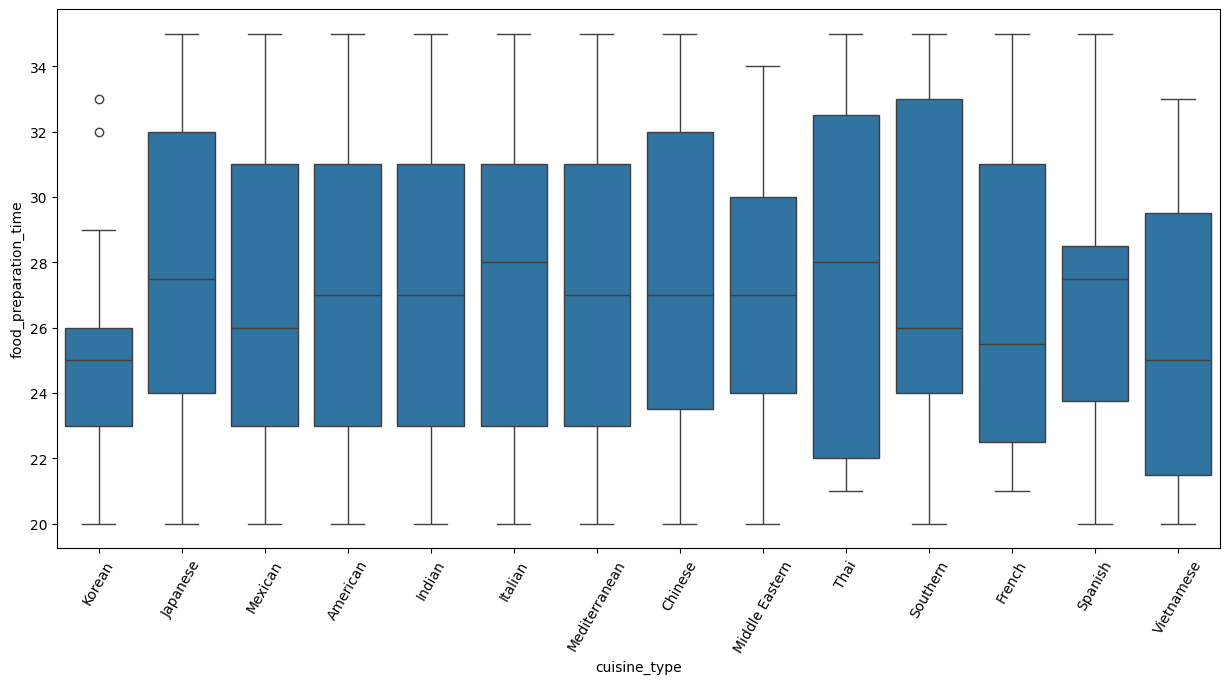

In [ ]:
# Relationship between food preparation time and cuisine type
plt.figure(figsize=(15,7))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df)  ## Complete the code to visualize the relationship between food preparation time and cuisine type using boxplot
plt.xticks(rotation = 60)
plt.show()

#### Day of the Week vs Delivery time

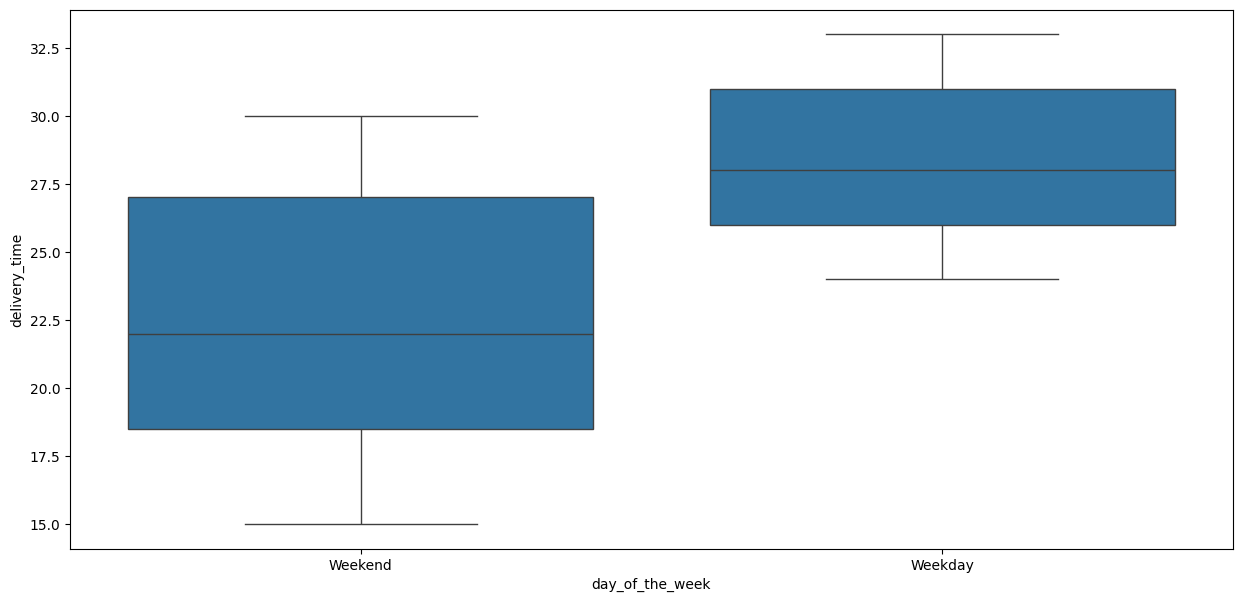

In [ ]:
# Relationship between day of the week and delivery time
plt.figure(figsize=(15,7))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)  ## Complete the code to visualize the relationship between day of the week and delivery time using boxplot
plt.show()

#### Run the below code and write your observations on the revenue generated by the restaurants.

In [ ]:
df.groupby(['restaurant_name'])['cost_of_the_order'].sum().sort_values(ascending = False).head(14)

,cost_of_the_order
restaurant_name,
Shake Shack,3579.53
The Meatball Shop,2145.21
Blue Ribbon Sushi,1903.95
Blue Ribbon Fried Chicken,1662.29
Parm,1112.76
RedFarm Broadway,965.13
RedFarm Hudson,921.21
TAO,834.50
Han Dynasty,755.29


#### Rating vs Delivery time

In [ ]:
# Calculate the summary statistics for cost of order by cuisine type
summary_stats = df.groupby('rating')['delivery_time'].describe()

# Display the summary statistics
print(summary_stats)

           count       mean       std   min   25%   50%   75%   max
rating                                                             
3          188.0  24.558511  4.652845  15.0  21.0  25.0  28.0  33.0
4          386.0  23.867876  4.923377  15.0  20.0  24.0  28.0  33.0
5          588.0  24.212585  5.018607  15.0  20.0  25.0  28.0  33.0
Not given  736.0  24.173913  5.041021  15.0  20.0  25.0  28.0  33.0


In [ ]:
rating_analysis = df.groupby('restaurant_name')['delivery_time'].agg(['count', 'mean', 'median', 'std']).reset_index()
print(rating_analysis)


      restaurant_name  count       mean  median       std
0          'wichcraft      1  28.000000    28.0       NaN
1           12 Chairs      4  27.750000    26.5  2.872281
2     5 Napkin Burger      5  24.400000    24.0  3.781534
3           67 Burger      1  28.000000    28.0       NaN
4             Alidoro      1  22.000000    22.0       NaN
..                ...    ...        ...     ...       ...
173    Zero Otto Nove      2  21.500000    21.5  4.949747
174              brgr      2  25.000000    25.0  1.414214
175        da Umberto      3  28.000000    28.0  2.000000
176  ilili Restaurant     18  24.888889    26.0  5.819732
177         indikitch      4  25.500000    28.0  6.608076

[178 rows x 5 columns]


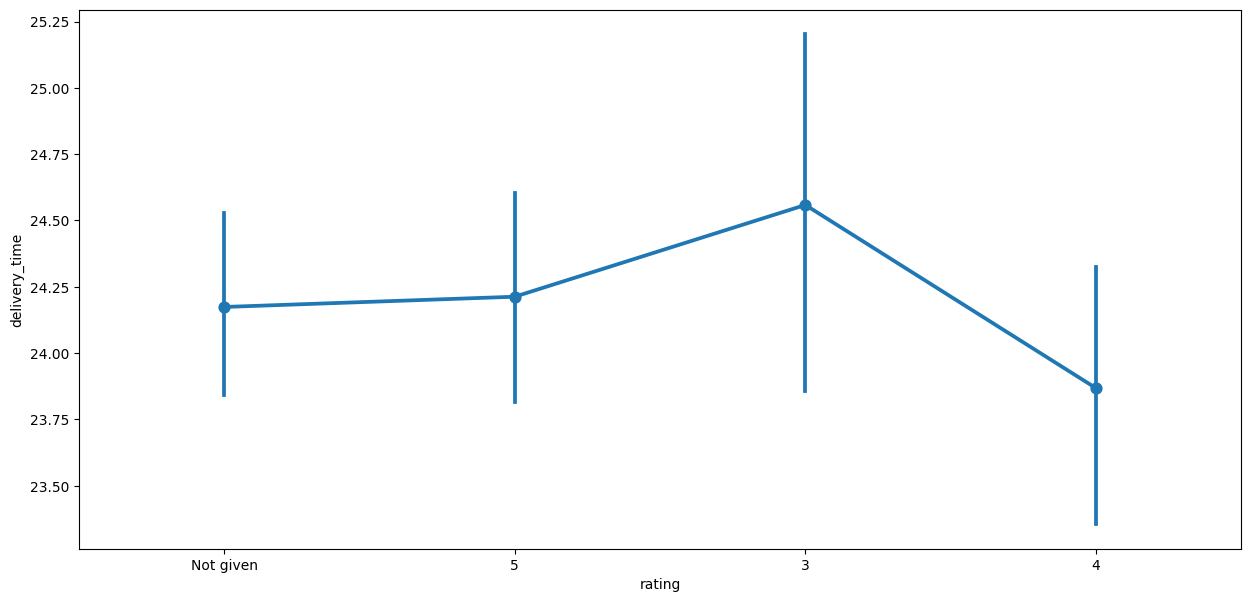

In [ ]:
# Relationship between rating and delivery time
plt.figure(figsize=(15, 7))
sns.pointplot(x = 'rating', y = 'delivery_time', data = df)
plt.show()

#### Rating vs Food preparation time

In [ ]:
# Calculate the summary statistics for cost of order by cuisine type
summary_stats = df.groupby('rating')['food_preparation_time'].describe()

# Display the summary statistics
print(summary_stats)

           count       mean       std   min   25%   50%    75%   max
rating                                                              
3          188.0  27.430851  4.768491  20.0  23.0  27.0  32.00  35.0
4          386.0  27.396373  4.620776  20.0  23.0  27.0  31.75  35.0
5          588.0  27.355442  4.693813  20.0  23.0  27.5  32.00  35.0
Not given  736.0  27.357337  4.562942  20.0  23.0  27.0  31.00  35.0


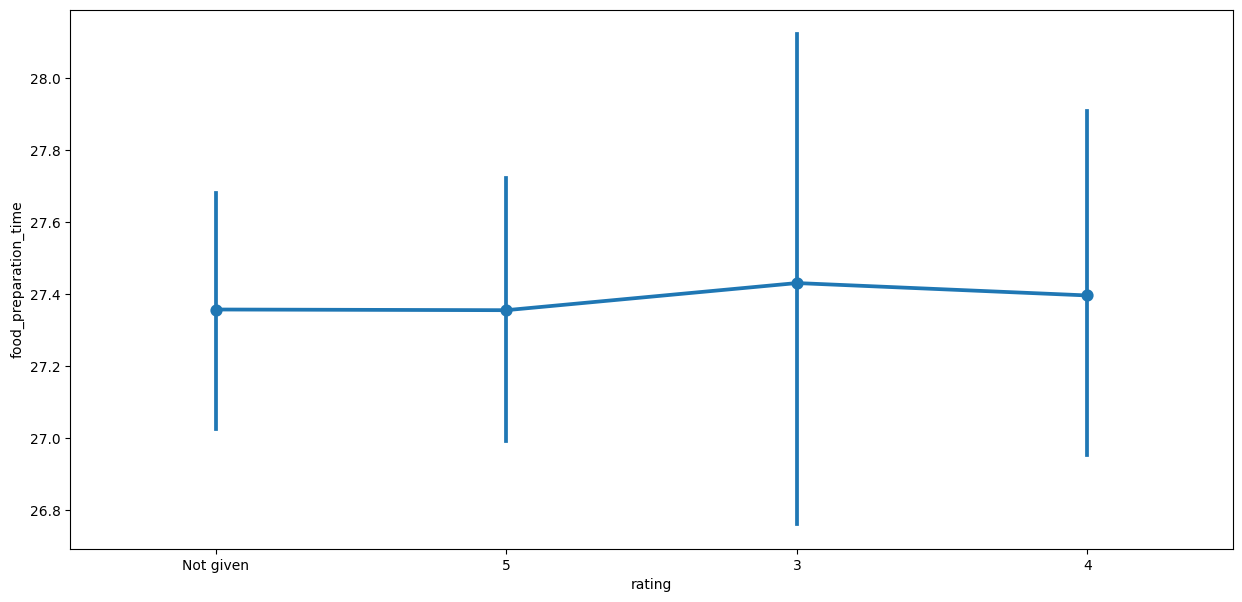

In [ ]:
# Relationship between rating and food preparation time
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x='rating',y = 'food_preparation_time')  ## Complete the code to visualize the relationship between rating and food preparation time using pointplot
plt.show()

#### Rating vs Cost of the order

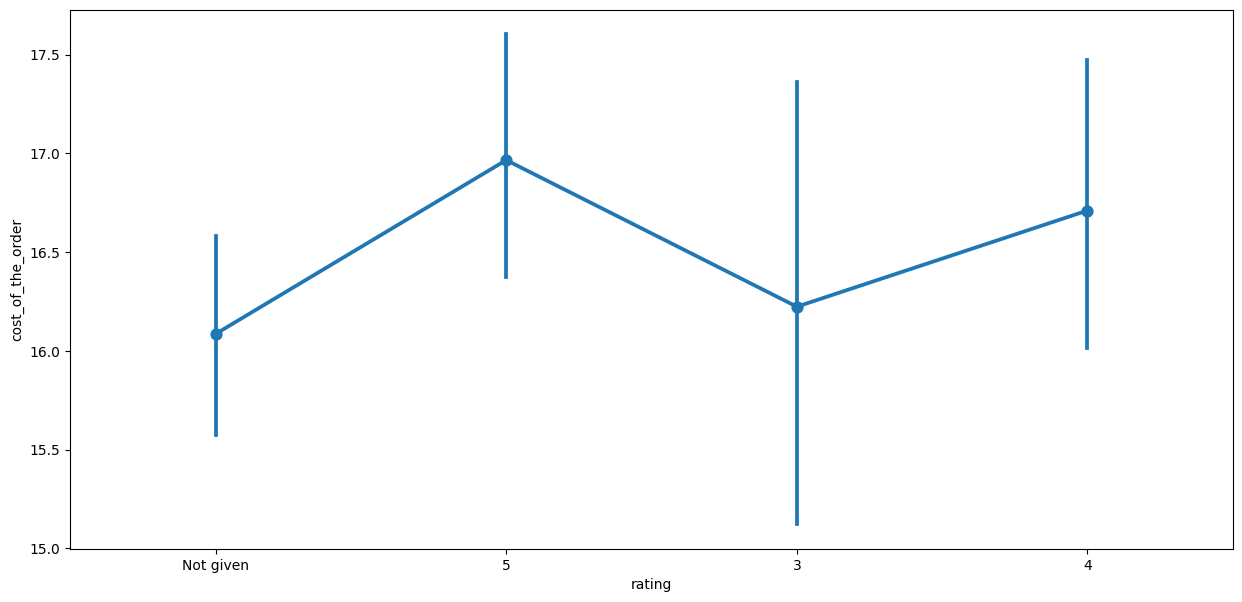

In [ ]:
# Relationship between rating and cost of the order
plt.figure(figsize=(15, 7))
sns.pointplot(data = df, x='rating',y = 'cost_of_the_order')     ## Complete the code to visualize the relationship between rating and cost of the order using pointplot
plt.show()

#### Correlation among variables

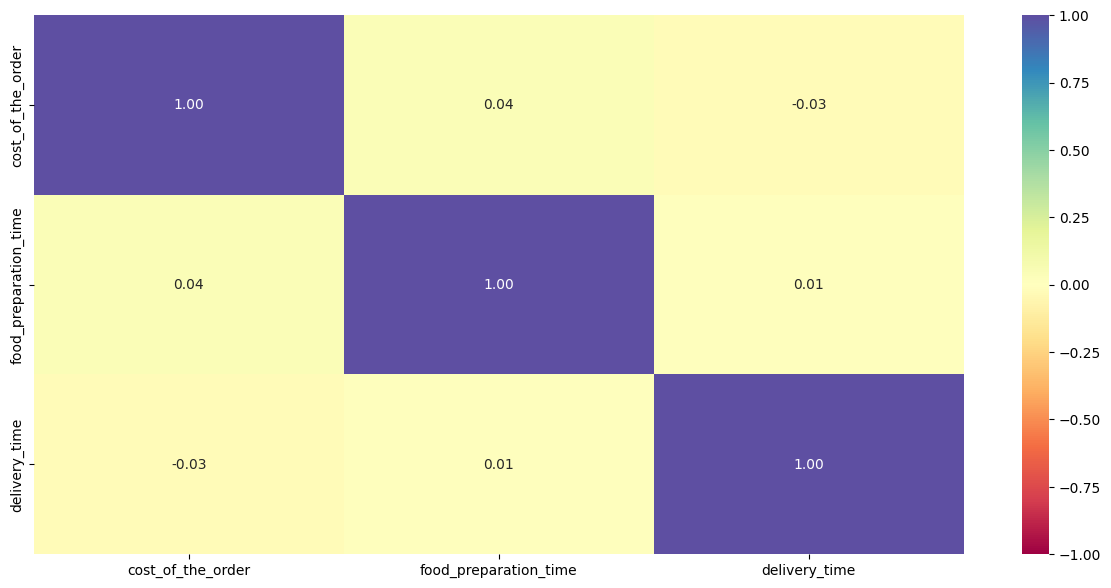

In [ ]:
# Plot the heatmap
col_list = ['cost_of_the_order', 'food_preparation_time', 'delivery_time']
plt.figure(figsize=(15, 7))
sns.heatmap(df[col_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer

In [ ]:
# Filter the rated restaurants
df_rated = df[df['rating'] != 'Not given'].copy()

# Convert rating column from object to integer
df_rated['rating'] = df_rated['rating'].astype('int')

# Create a dataframe that contains the restaurant names with their rating counts
df_rating_count = df_rated.groupby(['restaurant_name'])['rating'].count().sort_values(ascending = False).reset_index()
df_rating_count.head()

,restaurant_name,rating
0,Shake Shack,133
1,The Meatball Shop,84
2,Blue Ribbon Sushi,73
3,Blue Ribbon Fried Chicken,64
4,RedFarm Broadway,41


In [ ]:
# Get the restaurant names that have rating count more than 50
rest_names = df_rating_count[df_rating_count['rating'] > 50]['restaurant_name']

# Filter to get the data of restaurants that have rating count more than 50
df_mean_4 = df_rated[df_rated['restaurant_name'].isin(rest_names)].copy()

# Group the restaurant names with their ratings and find the mean rating of each restaurant
df_mean_4_rating = df_mean_4.groupby(['restaurant_name'])['rating'].mean().sort_values(ascending = False).reset_index().dropna() ## Complete the code to find the mean rating

# filter for average rating greater than 4
df_avg_rating_greater_than_4 = df_mean_4_rating[df_mean_4_rating['rating'] > 4].sort_values(by='rating', ascending=False).reset_index(drop=True)  ## Complete the code to find restaurants with rating > 4

df_avg_rating_greater_than_4

,restaurant_name,rating
0,The Meatball Shop,4.511905
1,Blue Ribbon Fried Chicken,4.328125
2,Shake Shack,4.278195
3,Blue Ribbon Sushi,4.219178


The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders.

In [ ]:
#function to determine the revenue
def compute_rev(x):
    if x > 20:
        return x*0.25
    elif x > 5:
        return x*0.15
    else:
        return x*0

df['Revenue'] = df['cost_of_the_order'].apply(compute_rev) ## Write the apprpriate column name to compute the revenue
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,Revenue
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,7.6875
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,1.8120
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,1.8345
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,7.3000
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,1.7385


In [ ]:
# get the total revenue and print it
total_rev = df['Revenue'].sum() ## Write the appropriate function to get the total revenue
print('The net revenue is around', round(total_rev, 2), 'dollars')

The net revenue is around 6166.3 dollars


The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered


In [ ]:
# Calculate total delivery time and add a new column to the dataframe df to store the total delivery time
df['total_time'] = df['food_preparation_time'] + df['delivery_time']


## Write the code below to find the percentage of orders that have more than 60 minutes of total delivery time (see Question 9 for reference)


# Count orders with total_time > 60 minutes
above_60 = df[df['total_time'] > 60].shape[0]

# Total number of orders
total_orders = df.shape[0]

# Calculate percentage
percentage = (above_60 / total_orders) * 100


print("Percentage of orders that have more than 60 minutes of total delivery time:", round(percentage, 2), '%')



Percentage of orders that have more than 60 minutes of total delivery time: 10.54 %


The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends?

In [ ]:
# Get the mean delivery time on weekdays and print it
print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekday']['delivery_time'].mean()),
     'minutes')


## Write the code below to get the mean delivery time on weekends and print it

print('The mean delivery time on weekdays is around',
      round(df[df['day_of_the_week'] == 'Weekend']['delivery_time'].mean()),
     'minutes')







The mean delivery time on weekdays is around 28 minutes
The mean delivery time on weekdays is around 22 minutes


### Conclusion and Recommendations

### Recommnendations

* Promote less popular cuisines: Give more attention to cuisines like Vietnamese and Korean by offering special deals and promoting these cuisines among customers.

* Improve delivery times: Work with restaurants that have longer delivery times to help them speed up their processes. Faster delivery usually can lead to better ratings and happier customers.

* Lowering costs: Work with restaurants to see if the cost can be brought down especially for cuisine types such as French and Southern. This should improve the affordability and increase sales.

* Tailored recommendations: Use customer data to suggest dishes or cuisines they might like based on what they’ve ordered before. This can improve their experience and encourage repeat orders.

* Get more detailed feedback: Encourage customers to share feedback on both the food and delivery experience. This will help identify areas where improvements are needed.

* Encourage customers to rate orders: With over 40% of orders unrated, offering incentives like points or discounts for ratings can improve feedback quality, reduce unrated orders, and enhance customer experience.


---